In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

DATASET_COLUMNS  = ['sentiment','id','date','query','user','text']

data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names=DATASET_COLUMNS ,header=None)

print("Dataset shape:", data.shape)

Dataset shape: (1600000, 6)


In [39]:
data.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [41]:
data['sentiment'].unique()

array([0, 4])

In [43]:
# Replacing the value 4 -> 1 for ease of understanding.
data['sentiment'] = data['sentiment'].replace(4,1)
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [44]:
data.describe()

,sentiment,id
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [47]:
# check the number of positive vs. negative tagged sentences
positives = data['sentiment'][data.sentiment == 1 ]
negatives = data['sentiment'][data.sentiment == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1600000
No. of positve tagged sentences is:  800000
No. of negative tagged sentences is: 800000


In [48]:
def remove_hashtags(sentence):
    return re.sub(r'[^a-zA-Z]', " ",sentence)

def remove_usernames(sentence):
    return re.sub(r'@[A-Z0-9a-z_:]+','',sentence)

def remove_retweet_tags(sentence):
    return re.sub(r'^[RT]+','',sentence)

def remove_urls(sentence):
    return re.sub(r'(http|https|ftp)?://[A-Za-z0-9./]+','',sentence)

def clean_tweet(tweet):
    tweet = remove_usernames(tweet)
    tweet = remove_retweet_tags(tweet)
    tweet = remove_urls(tweet)
    tweet = remove_hashtags(tweet)
    return tweet.strip()

def remove_stopwords(tweet):
    return " ".join([word for word in tweet.split(" ") if word.lower() not in nlp.Defaults.stop_words])

def preproccess_pipeline(tweet):
    tweet = clean_tweet(tweet)
    tweet = remove_stopwords(tweet)
    return tweet


In [51]:
data['text'] = data['text'].apply(preproccess_pipeline)
df.head()

NameError: name 'nlp' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


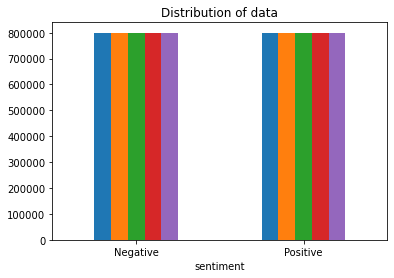

In [2]:
ax = data.groupby('sentiment')
        .count()
        .plot(kind='bar', title='Distribution of data', legend=False)

ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1600000):
    review = re.sub('[^a-zA-Z]', ' ', dataset[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

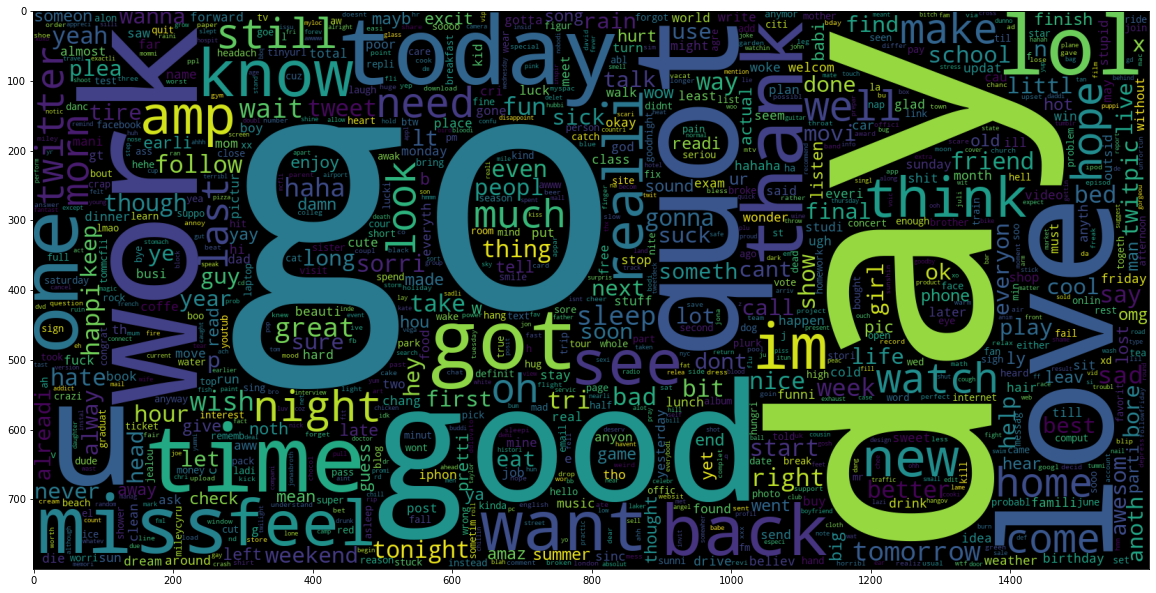

In [3]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 420)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

#from sklearn.feature_extraction.text import TfidfVectorizer
#vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500)
#vectoriser.fit(x_train)


#x_train = vectoriser.transform(x_train)
#x_test=vectoriser.transform(x_test)

from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=42)
classifier.fit(x_train, y_train)

y_pred = classifier.predict_proba(x_test)

In [5]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict_proba(x_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2_actual = classifier2.predict(x_test)
y_pred2=classifier2.predict_proba(x_test)

In [7]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42, max_iter=200)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.decision_function(x_test)

/opt/anaconda3/envs/python-ws/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42, max_iter=200)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.decision_function(x_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier 
classifier5=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(x_train, y_train)
y_pred5=classifier5.predict_proba(x_test)

[[119103  40712]
 [ 51336 108849]]
0.71235
0.7120543368419233
0.7132956647054868
0.7123880029874766
              precision    recall  f1-score   support

           0       0.70      0.75      0.72    159815
           4       0.73      0.68      0.70    160185

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000

0.7123880029874766


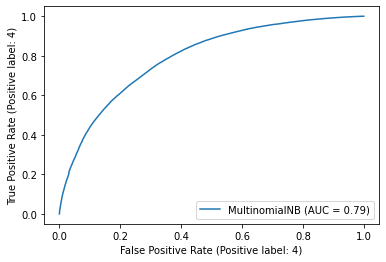

In [37]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score

#x_train, x_test, y_train, y_test

#print(np.unique(y_train))
#print(np.unique(y_test))
#print(np.unique(y_pred))

cm = confusion_matrix(y_test, y_pred2_actual)
print(cm)


print(accuracy_score(y_test, y_pred2_actual))
print(f1_score(y_test, y_pred2_actual,average='macro'))
print(precision_score(y_test,y_pred2_actual,average='macro'))
print(recall_score(y_test,y_pred2_actual,average='macro'))
print(classification_report(y_test, y_pred2_actual))

plot_roc_curve(classifier2,x_test,y_test)

print(roc_auc_score(y_test,y_pred2_actual,average='macro'))

In [ ]:
from sklearn.metrics import roc_curve
print(len(y_pred))

print(y_pred.shape)
#y_pred = y_pred[:,1]
rad_fpr, rad_tpr,_= roc_curve(y_test,y_pred,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(rad_fpr.shape)
print(rad_tpr.shape)
plt.plot(rad_fpr, rad_tpr,  marker='.', label='Random Forest' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
y_pred1 = y_pred1[:,1]
print(y_pred1.shape)
lr_fpr, lr_tpr,_= roc_curve(y_test,y_pred1,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(lr_fpr.shape)
print(lr_tpr.shape)
plt.plot(lr_fpr, lr_tpr,  marker='.', label='Logistic' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred2.shape)
y_pred2 = y_pred2[:,1]
nb_fpr, nb_tpr,_= roc_curve(y_test,y_pred2,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
print(y_pred3.shape)
#y_pred3 = y_pred3[:,1]
svm_fpr, svm_tpr,_= roc_curve(y_test,y_pred3,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(svm_fpr, svm_tpr,  marker='.', label='SVM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred4.shape)
#y_pred4 = y_pred4[:,1]
SGD_fpr, SGD_tpr,_= roc_curve(y_test,y_pred4,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(SGD_fpr.shape)
print(SGD_tpr.shape)
plt.plot(SGD_fpr, SGD_tpr,  marker='.', label='SGDC' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred5.shape)
y_pred5 = y_pred5[:,1]
dt_fpr, dt_tpr,_= roc_curve(y_test,y_pred5,pos_label=4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(dt_fpr.shape)
print(dt_tpr.shape)
plt.plot(dt_fpr, dt_tpr,  marker='.', label='Decision Tree' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
plt.show()

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs,pos_label=4)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rad_fpr, rad_tpr,  linestyle='-', label='Random Forest' )
plt.plot(lr_fpr, lr_tpr,  linestyle='--', label='Logistic' )
plt.plot(nb_fpr, nb_tpr,  linestyle='--', label='Naive Bayes' )
plt.plot(svm_fpr, svm_tpr,  linestyle='--', label='SVM' )
plt.plot(SGD_fpr, SGD_tpr,  linestyle='--', label='SGDC' )
plt.plot(dt_fpr, dt_tpr,  linestyle='--', label='Decision Tree' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()